# Project Financial Analysis

## Part 4: Machine learning

In [1]:
# Step 1: Import your libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Step 2: Read your CSV and slice the date such that you ony have 2009-2019 data
df = pd.read_csv('finance_data_extended.csv', index_col=0, parse_dates=True)

new_df = df.loc['2009']
for i in range(9):
    new_df = pd.concat([new_df,df.loc[str(2010 + i)]])
new_df.sort_index(inplace=True)
new_df

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2009-01-02,0.525,0.525,0.52,0.52,0,4,2,1
2009-01-05,0.525,0.525,0.52,0.52,0,0,5,1
2009-01-06,0.525,0.525,0.52,0.52,0,1,6,1
2009-01-07,0.525,0.525,0.52,0.52,0,2,7,1
2009-01-08,0.530,0.530,0.53,0.53,12000,3,8,1
...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.660,0.66,0.66,0,3,20,12
2018-12-21,0.660,0.660,0.66,0.66,0,4,21,12
2018-12-24,0.660,0.660,0.66,0.66,0,0,24,12
2018-12-26,0.660,0.660,0.66,0.66,0,2,26,12


### Step 3: Dummify your data
We are going to extract more data from the existing columns, more specifially day, day_of_month, and month. We will turn the date features into dummies. 

Technically, the date features should not be considered as continuous, but rather as categorical variables. E.g., in month column, 1 is January and January is categorical data.

We will dummify the following columns:
1. day
2. day_of_month
3. month

In [3]:
# Step 3: Dummify the day, day_of_month, and month columns and store each of them in a variable
df_day = pd.get_dummies(new_df['day'], prefix='Day')
df_day

,Day_0,Day_1,Day_2,Day_3,Day_4
2009-01-02,0,0,0,0,1
2009-01-05,1,0,0,0,0
2009-01-06,0,1,0,0,0
2009-01-07,0,0,1,0,0
2009-01-08,0,0,0,1,0
...,...,...,...,...,...
2018-12-20,0,0,0,1,0
2018-12-21,0,0,0,0,1
2018-12-24,1,0,0,0,0
2018-12-26,0,0,1,0,0


In [4]:
df_dayofmonth = pd.get_dummies(new_df['day_of_month'], prefix = 'dayofmonth')
df_dayofmonth

,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,dayofmonth_6,dayofmonth_7,dayofmonth_8,dayofmonth_9,dayofmonth_10,...,dayofmonth_22,dayofmonth_23,dayofmonth_24,dayofmonth_25,dayofmonth_26,dayofmonth_27,dayofmonth_28,dayofmonth_29,dayofmonth_30,dayofmonth_31
2009-01-02,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-05,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-06,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-07,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-08,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-12-24,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2018-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df_month = pd.get_dummies(new_df['month'], prefix = 'month')
df_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2009-01-02,1,0,0,0,0,0,0,0,0,0,0,0
2009-01-05,1,0,0,0,0,0,0,0,0,0,0,0
2009-01-06,1,0,0,0,0,0,0,0,0,0,0,0
2009-01-07,1,0,0,0,0,0,0,0,0,0,0,0
2009-01-08,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0,0,0,0,0,0,0,0,0,0,0,1
2018-12-21,0,0,0,0,0,0,0,0,0,0,0,1
2018-12-24,0,0,0,0,0,0,0,0,0,0,0,1
2018-12-26,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
# Step 4: Concatenate your dummified columnar data
df_dummified = pd.concat([df_day, df_dayofmonth,df_month],axis = 1)
df_dummified

,Day_0,Day_1,Day_2,Day_3,Day_4,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2009-01-02,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-05,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2009-01-06,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-07,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-08,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-21,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-24,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-26,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Step 5: Prepare the final version of the DataFrame
After getting the concatenated dummies, the last step is to concatenate the the DataFrame containing the price information and the concatenated dummies. 

From the original DataFrame containing the prices, we just need:
1. "1. open"
2. "4. close"
3. "5. volume"

In [7]:
# Step 5: Get your final DataFrame
df_final = pd.concat([new_df[['1. open', '4. close', '5. volume']], df_dummified], axis = 1)
df_final

,1. open,4. close,5. volume,Day_0,Day_1,Day_2,Day_3,Day_4,dayofmonth_1,dayofmonth_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2009-01-02,0.525,0.52,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2009-01-05,0.525,0.52,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-06,0.525,0.52,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-07,0.525,0.52,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-01-08,0.530,0.53,12000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-20,0.660,0.66,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-21,0.660,0.66,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-24,0.660,0.66,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2018-12-26,0.660,0.66,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Step 6: Prepare your independent and dependent variables
Once you're done with the final dataset, time to split them once more. In our case, our dependent variable is the close price and the independent variables are everything else besides the close price.

1. Declare a variable, and assign your independent variables to it, i.e. drop "4. close" from the DataFrame from Step 5
2. Declare a variable, and assign only values from "4. close"

In [8]:
# Step 6: Prepare your independent and dependent variables
y = df_final['4. close']
X = df_final.drop('4. close', axis = 1)

In [9]:
# Step 7: Import the libraries that you need
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [10]:
# Step 8: Split your data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 9a: Declare a variable to store your chosen model
lr = LinearRegression()

# Step 9b: Fit your train dataset
lr.fit(X_train, y_train)
# Step 9c: Declare a variable and store your predictions using X test data
y_hat_lr = lr.predict(X_test)

0.009226019672618244


Text(0, 0.5, 'Price')

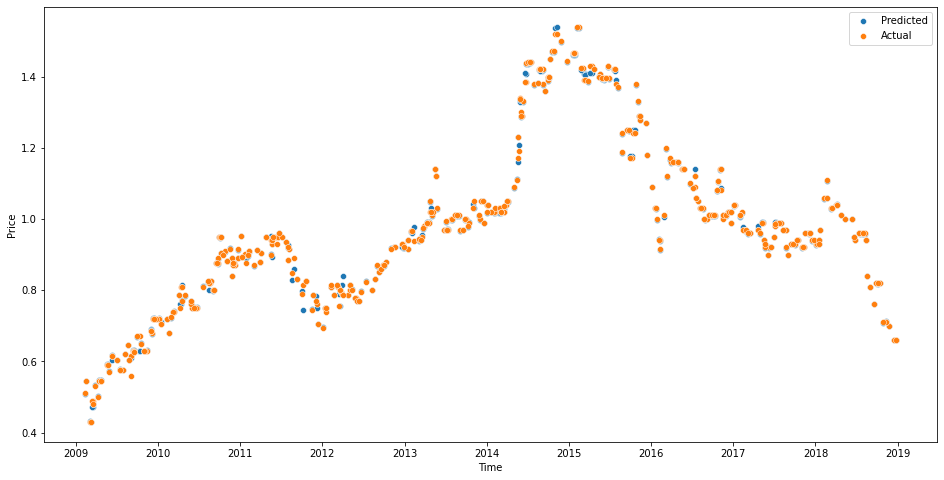

In [12]:
# Step 10a: Print the RMSE between the y test and the prediction
print(np.sqrt(mean_squared_error(y_test, y_hat_lr)))

# Step 10b: Plot test dependent variables vs predictions
plt.figure(figsize=(16,8))
sns.scatterplot(x = y_test.index, y = y_hat_lr, label = 'Predicted')
sns.scatterplot(x = y_test.index, y = y_test, label = 'Actual')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')

### Step 11: Split the data based on time
From the diagram, it's time to split the train data from Step 6 non-randomly.

To do so, <strong>slice</strong> the data such that:
1. Train data for X and y is the first 80%
2. Test data for X and y is the last 20%

In [13]:
# Step 11: Slice your DataFrame based on time
X_train = X[:int(len(X) * 0.8)]
y_train = y[:int(len(y) * 0.8)]

X_test = X[int(len(X) * 0.8):]
y_test = y[int(len(y) * 0.8):]

0.003382814286893908


Text(0, 0.5, 'Price')

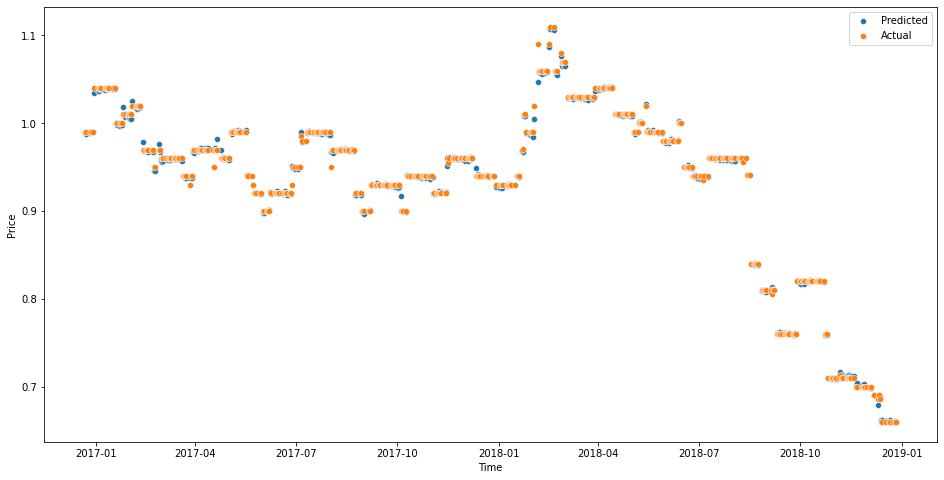

In [14]:
# Step 12a: Declare a variable to store your chosen model
lr_2 = LinearRegression()
# Step 12b: Fit your train dataset
lr_2.fit(X_train, y_train)
# Step 12c: Declare a variable and store your predictions using X test data
y_hat_lr_2 = lr_2.predict(X_test)
# Step 12d: Print the RMSE between the y test and the prediction
print(np.sqrt(mean_squared_error(y_test, y_hat_lr_2)))
# Step 12e: Plot test dependent variables vs predictions
plt.figure(figsize=(16,8))
sns.scatterplot(x = y_test.index, y = y_hat_lr_2, label = 'Predicted')
sns.scatterplot(x = y_test.index, y = y_test, label = 'Actual')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')

### Step 13: Plot the lineplot with the actual and predicted prices
On top of using RMSE and plotting the scatter plot between actual and predicted prices, we can also plot the time series data. 

We will overlay the prediction over the test data to see how agreeable those two are.

Here's what you need to do:
1. Create a Series/DataFrame containing the predicted values
2. Assign the DataTime found in the test data as the index of the Series/DataFrame you just created
3. Plot "4. close" from your train data from t=1 to t=0.8T (where T is time from 2009 to 2019)
4. Plot "4. close" test data from your test data from t=0.8T to t=T
5. Plot your prediction

In [15]:
# Step 13a: Create a Series/DataFrame containing the prediction
df_predicted = pd.DataFrame(index = y.index[int(len(y)*0.8):], data = y_hat_lr_2, columns = ['predicted'])
df_predicted
# let the index is the same as the test data's DateTime

,predicted
2016-12-22,0.989194
2016-12-23,0.987692
2016-12-27,0.988349
2016-12-28,0.990391
2016-12-29,0.990273
...,...
2018-12-20,0.660013
2018-12-21,0.662013
2018-12-24,0.659614
2018-12-26,0.661257


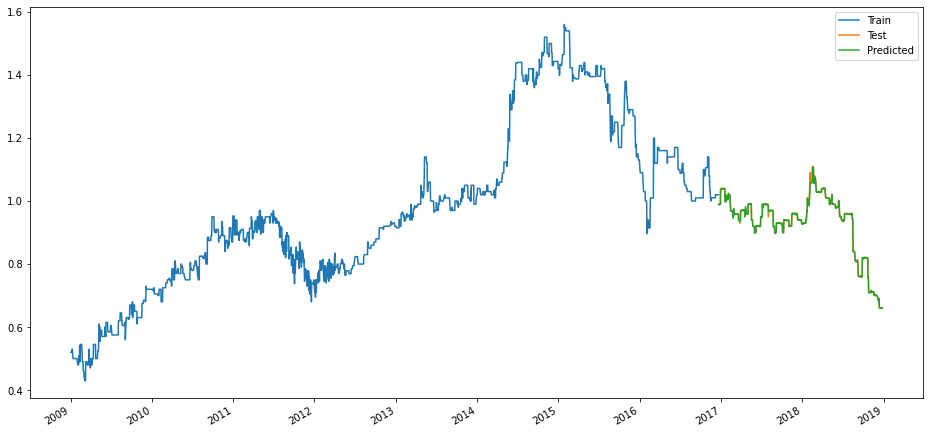

In [16]:
# Step 13b: Plot your close price from train data, test data, and finally your prediction from the DataFrame in 13a
plt.figure(figsize = (16,8))
df_final['4. close'][:int(len(X)*0.8)].plot(label = 'Train')
df_final['4. close'][int(len(X)*0.8):].plot(label = 'Test')
df_predicted['predicted'].plot(label='Predicted')
plt.legend()